# Quantum Computing 1

* **Author:**
* **Date:**
* **Time Spent on this Assignment:**

To install qiskit, open a terminal and type (copy/paste):
```
export PATH=/software/Jupyterhub/jupyterhub-base-kernel/bin:$PATH
export LD_LIBRARY_PATH=/software/Jupyterhub/jupyterhub-base-kernel/lib
source ~/owl/bin/activate; pip install qiskit; exit
```

In [81]:
import qiskit
from qiskit import *
import numpy as np
from qiskit.visualization import *
import pylab as plt

Today we will do most our simulations on a classical simulator that runs on the OWL server.  But, we will run one thing on an actual quantum computer.  To do that, you need to sign up for the quantum computer. Go ahead and sign up for a quantum computing account here: https://quantum-computing.ibm.com/login

You will need to put your API key into the commented out section below so it will know to run your code on the quantum computer. 

In [82]:

# first do IBMQ.save_account("your API Key")
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Here is a link to the picture of the machine you will be running on: 
https://github.com/Qiskit/ibmq-device-information/tree/master/backends/yorktown/V1

In [83]:
def RunMe(qc,num_shots=1024):
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc, backend,shots=num_shots)
    result = job.result()
    return result

def RunMeState(qc):
    backend = BasicAer.get_backend('statevector_simulator')
    job = execute(qc, backend,shots=1024)
    result = job.result()
    return result

def RunMeQC(qc):
    provider = IBMQ.get_provider(hub='ibm-q')
    from qiskit.providers.ibmq import least_busy
    small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5
                                       and not x.configuration().simulator)
    backend = least_busy(small_devices)
    jobReal = execute(qc, backend)
    return jobReal


def StateToBinary(b):
    wires=int(round(np.log2(len(b))))
    for i in range(0,2**wires):
        myFormat="0"+str(wires)+"b"
        if np.abs(b[i])!=0:
            print(b[i],'|',format(i, myFormat)[::-1],'>')


## Exercise 1: A Single Qubit (33 points)

We are going to think about quantum computers today.  More specifically, we are going to think about quantum circuits.  Both quantum and classical circuits have wires and gates.  Quantum circuits have the added constraint that the total number of wires must be the same through the whole computation.

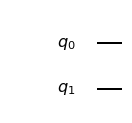

In [84]:
qc = QuantumCircuit(2)
qc.draw(output='mpl')

We can think of classical circuit as one which takes a binary number as input (on,off,off,on) <--> (1,0,0,1) to a binary number as output.

For example a wire with a not gate on it takes $0\rightarrow 1$ and $1 \rightarrow 0$

Quantum circuits are similar.  They take binary numbers to other binary numbers.  A quantum `not` gate takes $0 \rightarrow 1$ and $1 \rightarrow 0.$

Let's start by drawing our first circuit.  This circuit has one quantum wire. We are going to put a "not" gate (called X here).  By default, the input to our circuits is always "0".

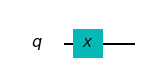

In [85]:
quantumWires=1
qc = QuantumCircuit(quantumWires)
qc.x(0) # this is a quantum NOT Gate.
qc.draw(output='mpl')

We are now going to run our circuit.  There are three ways we can run circuits:
* Run it on a real quantum computer -  `RunMeQC`
* Run it on a simulated quantum computer - `RunMe`
* Run it on a simulated quantum computer and cheat by looking what's going on under the hood (you can't do this in the real world but there are some advantages of a simulation).  - `RunMeState`

Let's start by running our simulation (and looking under the hood).  Call `results=RunMeState(qc)` on our quantum circuit. We can then get the vector (look under the hood) by calling `StateToBinary(results.get_statevector())`

In [1]:
## add stuff here

Modify your circuit now and put two `not` gates in a row. 

(1+0j) | 0 >


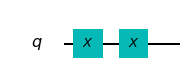

In [87]:
###This should be your modified circuit
qc.draw(output='mpl')

Now, what is particularly interesting about quantum gates is you can be in a situation where it can take $|0\rangle$ and returns a state which is partially $|0\rangle$ and partially $|1\rangle$.    For example, the Hadamard gate (`qc.h`), turns $|0\rangle$ into "half" $|0\rangle$ and "half" $|1\rangle$.  More concretely, you end up with the state 
$|0\rangle \rightarrow \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle \right)$.  Look at the state after the Hadamard. 

In [2]:
##Make a circuit with a Hadamard in it

So far we've been cheating by looking at the quantum state. In the real world, you can't do that.  Instead you have to measure at the end of your circuit.  To add a measure you have to do two things. First, you need a classical wire. We will switch
* `qc=QuantumCircuit(1)` $\rightarrow$ `qc=QuantumCircuit(1,1)` # one classical wire and one quantum wire
* Then at the end we have to add a measurement: `qc.measure([0],[0])` (measure quantum wire "1" on classical wire "1")

Go ahead and draw the new circuit that has one Hadamard gate and a measure

In [3]:
#Make your circuit here
qc.draw(output='mpl')

NameError: name 'qc' is not defined

Now, we can run it on a legitimate simulator by doing `results=RunMe(qc)`. Once we've run it, we are going to want to see the result of our measurement.  In practice, what `RunMe` is currently doing is running it 1024 times as each measurement is going to give you something random.  (You can look up to see what `RunMe` is doing).  Now, we should plot how many of the measurements is "0" and how many of the measurements is "1".  To do this, we can do `plot_histogram(results.get_counts())`  You can just see the counts by doing `print(results.get_counts())` Produce plots for 
* the circuit with one Hadamard wire. 
* the circuit with one Not wire. 

In [4]:
#Run the circuit and plot the results here for EPR

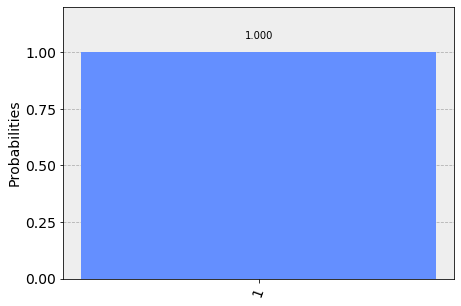

In [91]:
#Run the circuit and plot the results here for Not gate

You should see that the circuit with the "hadamard" gates gives half $|0\rangle$ and half $|1\rangle$ whereas the "not" gate always gives $|1\rangle$

So far we've seen we can get half $|0\rangle$ and half $|1\rangle$.  We can also adjust states to get more of $|1\rangle$ then $|0\rangle$ (or visa versa).  Generically we can get a state
$\cos(\theta) |0\rangle + \sin(\theta) e^{i\phi} |1\rangle$.

If we had such a state, after measurement we get "0" with probability $\cos^2\theta$ and "1" with probability $\sin^2\theta$.  
Notice that $\cos^2\theta + \sin^2\theta =1$ so we either get "0" or "1". 

To produce this state, we can use the gate `qc.rx(-2*theta,wire)` which takes $|0\rangle \rightarrow \cos \theta |0\rangle + \sin \theta |1\rangle$ 

* Produce a histogram with $\theta=0.5$ and check to make sure it gives you the right fraction of zero and one.
* Write a for loop which runs the circuit for 100 $\theta$ between 0 and $\pi$ and make sure the counts of "0" are approximately $1024 \times \cos^2\theta$. 

0.7701511529340699 0.22984884706593015


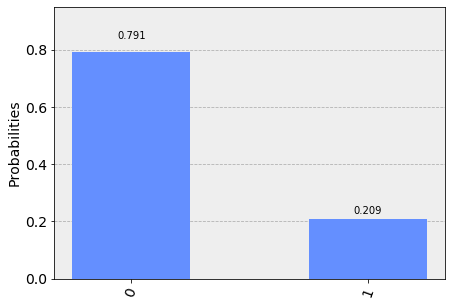

In [92]:
## Make the circuit and plot the measurements for the theta=0.5 . Check that it's correct

In [5]:
myData=[]
thetas=np.arange(0,np.pi,0.01)
for theta in thetas:
  # do stuff here
plt.plot(thetas,1024*np.cos(thetas)**2,'.')
plt.plot(thetas,myData)
plt.show()

IndentationError: expected an indented block (<ipython-input-5-657d144bcbb0>, line 5)

## Exercise 2: Two qubits (34 points)

In this exercise we will see how to build quantum states of two qubits.  


### a. Control-not gates

*The controlled-not gate:* The key gate for two qubits is the control-not gate (`qc.cx(0,1)`.  The key gate "nots" the second wire (wire 1) if the first wire is "1" (wire 0).  Let's check it out.  Apply the "control-not" to a state $|00\rangle$ and to a state $|10\rangle$ and print out the state (i.e. `RunMeState`). Don't put in a measurement.

In [94]:
### Circuit here applying control-not to |00>.  Print the state when you're done.

(1+0j) | 00 >


In [95]:
### Circuit here applying control-not to |10>.  Print the state when you're done.

(1+0j) | 11 >


### b.  Build an EPR Pair

The most interesting two qubit state is an EPR pair, $\frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$.    You can build it with two gates that you have seen earlier in this assignment.  Go ahead and try different things and figure out how to build yourself an EPR pair.  You can start out with 
```
quantumWires=2
classicalWires=2
qc=QuantumCircuit(quantumWires,classicalWires)
```
to start out a quantum circuit with two quantum wires (and two classical wires that you can do measurements on later).

In [6]:
### Make an EPR Pair. It can be done with Hadamards and CNOTs.  Run it and look at the state when you're done. 

### c. Measuring EPR Pairs

Let's go ahead and measure your EPR circuit above by adding the measurement and plotting it below. 

In [7]:
### Do the same thing with the EPR Pair but now look at the measurements.

There is something very powerful here.  If you get a "0" on the top wire, then you always get a "0" on the bottom wire.  If you get a "1" on the top wire, then you get a "1" on bottom wire.  This is even the case if these wires are taken miles apart before you measure.  

### d. Running on an actual Quantum Computer

Now we are going to build an EPR pair on an actual quantum computer.  To do this you need to build your quantum circuit again (with measurement) for building an EPR pair and then call `job=RunQC(qc)`

In [8]:
## Remake your circuit and run it on a real live quantum computer.

Once you have run that, your job is sent off to a quantum computer. It may take a bit of time to run.  To check whether it has run yet, we need to do 
```
print(job.status())
print(job.queue_position())
```

You should run these lines until your job status is `JobStatus.DONE`

In [99]:
print(job.status())
print(job.queue_position())

JobStatus.INITIALIZING
None


Now that your job has gotten off the quantum computer we can now query it.  To get the counts do
`job.result().get_counts`.  Go ahead and plot a histogram of them. 

You should notice that you don't get perfect correlation anymore.  Current quantum computers are not particularly good. 

In [9]:
#go ahead and make a histogram of the results.

### e. Entanglement 

The EPR pair is called entangled.  
**Not entangled** means  
Pr(wires measures "00")  = Pr(wire 0 measures "0") $\times$ Pr(wire 1 measures "0")
*Note that when you check things you aren't going to get this exactly even if things are independent because things are stochastic.  If you're careful you can compute error bars but otherwise use reasonable judgement*

We want to check if things are entangled.  To accomplish this, let's write a function to measure the probability that wire $i$ is 0 - i.e. `def wire_i_probability(myCounts,wire_i)` (you can assume `wire_i` will either be 0 or 1).

Now write a function `def wires_probability(myCounts)` which returns the probability that the two wires are "00".

Given these two functions we want to see which circuits produce entangled states.  In particular check
* The EPR Pair
* A circuit you generate which has no two wire gates in it (i.e. no CNOT)
and demonstrate what you find. 

*You should run this with the simulator and not on the quantum computer.*



In [101]:
# Measure the probability of getting "0" on the wire `wire`
def Probability(myCounts,wire):
    zeroProb=0.0
    if wire==0:

    elif wire==1:
    return zeroProb/1024.


In [10]:
## Now check the entanglement of the EPR pair and a state you make only using 1-qubit gates.

## Exercise 3 Quantum Key Distribution (EC - 20 points)

### a. One time pads

If Alice and Bob have two identical secret books of bits which agree, they could send secret messages to each other. Here's a way to make a bunch of secret bits by sharing a quantum state.  After the quantum state is produced, they can separate their wires to be far apart. 

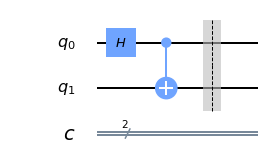

In [103]:


def MakeSinglet(qc):
    aliceWire=0
    bobWire=1
    qc.h(aliceWire)
    qc.cx(aliceWire,bobWire)

def MakeSharedState(qc):
    MakeSinglet(qc)
    qc.barrier()
    return qc

qc=QuantumCircuit(2,2)
qc=MakeSharedState(qc)
qc.draw(output='mpl')

Let `AliceWire=0` and `BobWire=1` . 
* Add some measurement to the circuit above
* execute this circuit 100 times (use `RunMe(qc,1)` so you only run one copy of it)
* store a list of Alice and Bob's bits and report what fraction of the time they agree.

For this latter task I find the following helpful: `    theKey=list(result.get_counts().keys())[0]`. `theKey` will be the bitstring of measured state *in reversed order* (i.e. `theKey[0]` is q0, `theKey[1]` is q1, etc)

In [11]:
aliceBits=[]
bobBits=[]

qc.measure([0,1],[0,1])
## After measurement how often do Alice and Bob's bits agree.

print("They agree this fraction of the time: " ,amountAgree)


NameError: name 'qc' is not defined

### b. Eve's arrival

Unfortunately this approach has a problem.  Suppose that you're sending an EPR pair to Alice and the eavesdropper Eve gets a hold of it.  Is their a way to have Eve sneakily get the message without Alice and Bob noticing?  Add some circuit for Eve.  Assume that she can do anything she wants to the state (and her wire) after the shared state is made but before it's shipped off to Alice and Bob. 

Then, measure what fraction of the time Alice and Bob agree and what fraction of the time Eve has successfully figured out the bit. 

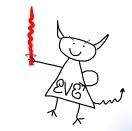

In [12]:

AliceBits=[]
EveBits=[]
BobBits=[]
eveWire=2
qc=QuantumCircuit(3,3)
qc=MakeSharedState(qc)
###What can Eve do here so that she knows the secret bit and can't be detected by Alice and Bob
qc.cx(0,2)
qc.measure([2],[2])
qc.barrier()
### Eve is done now. 

qc.measure([0,1],[0,1])  #this is your measure from earlier. 

###How often do Alice and Bob's bits agree.
### How often do Alice and Eve's bits agree.

NameError: name 'QuantumCircuit' is not defined

If you've done it correctly you should find that Alice and Bob always agree but also Alice and Eve also always agree.  So our protocol was a good way to share some secrete bits but doesn't work if Even can get a hold of the state before Alice and Bob gert it.  We need an improved protocol. 

### c. An improved protocol

Let's remove Eve for the moment and work on an improved protocol. 
Suppose Alice and Bob agree that for each of the 100 trials, Alice and Bob are going to flip a shared coin and decide to randomly put a Hadamard on both their wires if you get heads (`np.random.random()>0.5`) and leave it alone otherwise (*Yes - I know flipping a shared coin is cheating.  We will fix it later*).  Emulate this new protocol and see how often Alice and Bob's bits agree?  Store also an array which specifies when you decided to add the Hadamard.


In [13]:
### Build here the improved protocol and see how often Alice and Bob's bits agree.

### d. Eve in the improved protocol

Now add Eve back using your approach from (b).  How often do Alice and Bob agree?  How often do Alice and Eve agree?   Suppose Alice and Bob were willing to talk some - can they catch Eve's eavsdropping and still have some useful random bits left if Eve wasn't listening.

In [107]:
# Use the same Eve technique as you did in (b) and see how often they agree.  If Alice and Bob's bits don't 
# always agree is their a way for Alice and Bob to then detect Eve's eavesdropping while still having
# some one-time pad bits left.


Alice and Bob Agree:  0.74
Alice and Eve Agree:  0.71


### e.  Not flipping shared coins

In practice, Alice and Bob can't randomly choose to both use the Hadamard gate at the same time.   Let's assume instead they independently add a random Hadamard gate.  Modify your code to do this and record when Bob and Alice chose Hadamard.  Now write some code to allow Alice and Bob to identify when there is eavesdropping. To do this, Alice and Bob need to not only talk about what answers they got but also whether not they both added their Hadamard gate. 

In [15]:
HadamardA=[]
HadamardB=[]

## Now remove the cheating from the approach.  
## This time, Alice and Bob are going to have to talk about both the decisions they made (Hadamard or not)
## as well as what result they get

mask=np.array(HadamardA)==(HadamardB)

## How often do they agree if we only consider the cases when they made the same choice. 

NameError: name 'np' is not defined

## Exercise 4: Building up tools (EC - 10 points)

Now we are going to build up some tools and intuition so we can learn to build more complicated circuits. 

### a. Initializing a binary number

Often it is useful to get some binary state (like $|0110\rangle$) into your quantum computer.  Write a function `def Init(qc,myBinaryNumber)` which generates the state $|\textrm{myBinaryNumber}\rangle$. Run
```
Init(qc,'011')
qc.draw(output='mpl')
```


In [16]:

def Init(qc,myString='000'):
    #write me

qc=QuantumCircuit(3,3)
Init(qc,'011')
qc.draw(output='mpl')



IndentationError: expected an indented block (<ipython-input-16-64a1f88e0e9c>, line 4)

### b. A sum over all states

A useful state to be able to make is 
$$\frac{1}{\sqrt{N}}\sum_{i=1}^N |i\rangle$$

Write a function `def AllSum(qc,w)` which adds this circuit to qc for $N=2^w$.  Run it with $w=5$ and draw out your circuit.  

In [17]:
qr = QuantumRegister(5)
cr = ClassicalRegister(5)
qc=QuantumCircuit(qr,cr)
AllSum(qc,5)
qc.measure(qr,cr)

qc.draw(output='mpl')


NameError: name 'QuantumRegister' is not defined

Now run the state on your simulator and measure how often you get various states.

In [18]:
# Run me looking at the measurements and see what happens

### c.  Angle of a random gate

In this section, we are going to start out with a $R_z(\theta)$ gate but we don't know what $\theta$ is.  Your goal is to use other gates to figure out $\theta$.  Write some code which returns your guess of $\theta$.  To add your random gate to your circuit, you may call RandomGate(qc).

In [112]:
def RandomGateHelp():
    theta=np.random.random()*2*np.pi
    def RandomGate(qc):
        qc.rz(theta,0)
    return RandomGate

RandomGate=RandomGateHelp()

In [19]:
def ReturnTheta():
    qr=QuantumRegister(1)
    cr=ClassicalRegister(1)
    qc=QuantumCircuit(qr,cr)
    #change this function somehow
    RandomGate(qc)
    qc.measure(0,0)
    result=RunMe(qc)
    myCounts=result.get_counts()
    print(myCounts)
    return 0.0
print("Theta is ",ReturnTheta())

NameError: name 'QuantumRegister' is not defined

### d. Inverting a CNOT

Suppose you have a quantum computer which can generate a CNOT where the control wire is smaller then the NOT wire - i.e. `qc.cx(i,j)` where $i<j$.  Now, you need the gate `qc.cx(j,i)` . Figure out how to use 1-qubit gates and `qc.cx(i,j)` to build the gate `qc.cx(j,i)` and demonstrate that it works.  *Hint:* You can do this with one CNOT some number of Hadamards. 

In [20]:
# Write code here

### e. Deferred Measurements

Suppose you have a calculation where you do a measurement in the middle of your simulation.

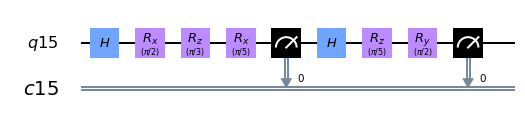

In [114]:
qr=QuantumRegister(1)
cr=ClassicalRegister(1)
qc=QuantumCircuit(qr,cr)
qc.h(0)
qc.rx(np.pi/2.,0)
qc.rz(np.pi/3.,0)
qc.rx(np.pi/5.,0)
qc.measure(0,0)
qc.h(0)
qc.rz(np.pi/5.,0)
qc.ry(np.pi/2.,0)
qc.measure(0,0)
qc.draw(output='mpl')

We can measure the probabilities of the output:

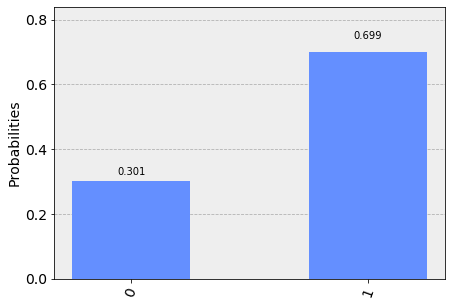

In [115]:
plot_histogram(RunMe(qc).get_counts())

We want to rewrite the circuit on two wires so that you can do all the measurements at the end.  Figure out how to pull this off and show that you get the same probability distribution over the first wire.  You should be able to do this essentially independently of the gates that I include on the top wire. *Hint:* You want to essentially copy what would have been the result of the measurement to the bottom wire.  Then you can measure the bottom wire whenever since there are no gates there.

In [22]:
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
qc=QuantumCircuit(qr,cr)
# do stuff before the measurement which is the last thing you do
qc.measure([0,1],[0,1])

qc.draw(output='mpl')
#only plot the probability of wire 1. You want to get the same result. 

NameError: name 'QuantumRegister' is not defined

**Acknowledgement:** 
* Bryan Clark and Ryan Level (original)


Copyright: 2021

---